In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
train_path="C:/Users/HP/Desktop/mini project/opdataset/train"
val_path="C:/Users/HP/Desktop/mini project/opdataset/test"

In [3]:
x_train=[]

for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(119,119))
        x_train.append(img_arr)

len(x_train)

5332

In [4]:
x_val=[]

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(119,119))
        x_val.append(img_arr)

len(x_val)

2648

In [5]:
# conversion to numpy array
train_x=np.array(x_train)

val_x=np.array(x_val)
#train_x = train_x.reshape(-1,1,119, 119)
#val_x = val_x.reshape(-1,1,119, 119)
# divide by 255 for normalization
# As the pixel values range from 0 to 256, so dividing all the values by 255 will convert it to range from 0 to 1
train_x=train_x/255.0

val_x=val_x/255.0

In [6]:
# compute labels of corresponding datasets using ImageDataGenerator (Keras tool)
train_datagen = ImageDataGenerator(rescale = 1./255)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
# labels are nothing but the corresponding folder names
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (119, 119),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

val_set = val_datagen.flow_from_directory(val_path,
                                          target_size = (119, 119),
                                          batch_size = 32,
                                          class_mode = 'sparse')

Found 5332 images belonging to 23 classes.
Found 2648 images belonging to 23 classes.


In [8]:
train_y=training_set.classes
val_y=val_set.classes
# Assuming train_y and val_y are already defined

# Printing labels for training set
print("Labels for Training Set:")
print(train_y)
print(len(train_y))
# Printing labels for validation set
print("\nLabels for Validation Set:")
print(val_y)
print(len(val_y))


Labels for Training Set:
[ 0  0  0 ... 22 22 22]
5332

Labels for Validation Set:
[ 0  0  0 ... 22 22 22]
2648


In [9]:
training_set.class_indices
train_y.shape,val_y.shape

((5332,), (2648,))

In [10]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

def inception_residual_network(input_shape):
    inception = InceptionV3(include_top=False, input_shape=input_shape)
    x = Flatten(name='flatten')(inception.output)
    x = Dense(23, activation='softmax')(x)
    model = Model(inception.input, x, name='inception_residual_network')
    return model

In [11]:
model = inception_residual_network((119,119,3))

In [12]:
model.summary()

Model: "inception_residual_network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 119, 119, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 59, 59, 32)        │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 59, 59, 32)        │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 59, 59, 32)        │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 57, 57, 32)        │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 57, 57, 32)        │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 57, 57, 32)        │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 57, 57, 64)        │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 57, 57, 64)        │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 57, 57, 64)        │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 28, 28, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 28, 28, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 28, 28, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 28, 28, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 26, 26, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 21,991,223 (83.89 MB)

 Trainable params: 21,956,791 (83.76 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [13]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [14]:
# compile the model
model.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(learning_rate=0.0005),metrics=['accuracy'])

# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=20,
  batch_size=16,shuffle=True)

Epoch 1/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 405s 1s/step - accuracy: 0.1641 - loss: 2.9124 - val_accuracy: 0.2175 - val_loss: 4.4508
Epoch 2/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 333s 997ms/step - accuracy: 0.4690 - loss: 1.6920 - val_accuracy: 0.6242 - val_loss: 3.2308
Epoch 3/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 333s 996ms/step - accuracy: 0.6183 - loss: 1.2125 - val_accuracy: 0.6110 - val_loss: 2.3005
Epoch 4/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.6117 - loss: 1.2467 - val_accuracy: 0.6488 - val_loss: 1.1956
Epoch 5/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 331s 990ms/step - accuracy: 0.7017 - loss: 0.9217 - val_accuracy: 0.7470 - val_loss: 0.8086
Epoch 6/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 329s 987ms/step - accuracy: 0.7683 - loss: 0.7121 - val_accuracy: 0.8180 - val_loss: 0.7652
Epoch 7/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 394s 1s/step - accuracy: 0.8051 - loss: 0.5952 - val_accuracy: 0.7768 - val_loss: 1.0507
Epoch 8/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step - accuracy: 0.8392 - loss: 0.498

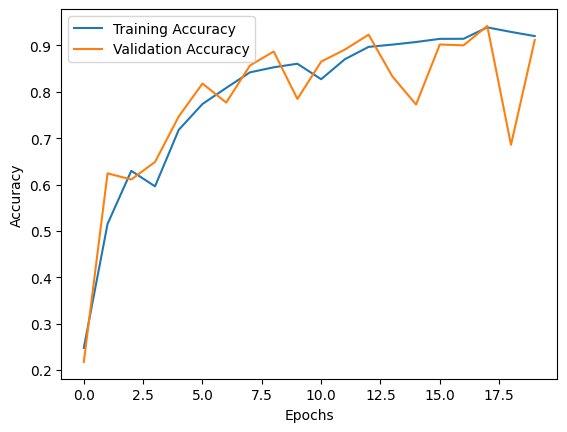

In [15]:
# accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

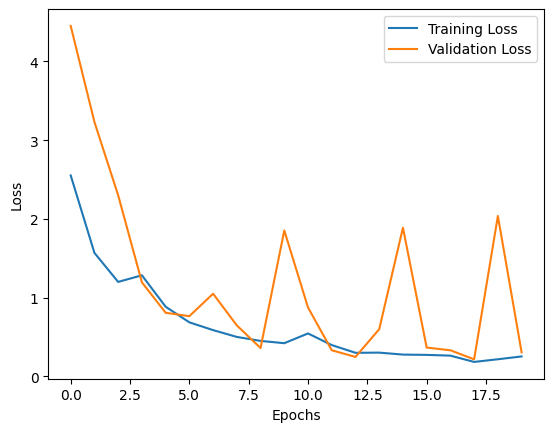

In [16]:
# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model.evaluate(val_x,val_y,batch_size=16)

166/166 ━━━━━━━━━━━━━━━━━━━━ 33s 200ms/step - accuracy: 0.9289 - loss: 0.2586


[0.3060034215450287, 0.9116314053535461]

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

# prediction
y_pred=model.predict(val_x)
y_pred=np.argmax(y_pred,axis=1)

# get classification report
print(classification_report(y_pred,val_y))

# get confusion matrix
print(confusion_matrix(y_pred,val_y))

83/83 ━━━━━━━━━━━━━━━━━━━━ 35s 385ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       121
           1       0.97      0.84      0.90       135
           2       0.98      0.98      0.98       113
           3       1.00      0.93      0.96       124
           4       0.96      0.97      0.97       108
           5       0.86      0.94      0.90       108
           6       0.96      0.81      0.88       144
           7       0.81      0.98      0.89        96
           8       0.82      0.93      0.87       104
           9       0.60      1.00      0.75        66
          10       0.91      0.73      0.81       150
          11       0.93      0.93      0.93       110
          12       0.96      0.88      0.92       122
          13       0.86      1.00      0.92       101
          14       0.77      0.76      0.77       113
          15       0.88      0.95      0.91       110
          16       0.93      1.00      

In [19]:
model.save('modellac70.h5')

In [20]:
val_path="C:/Users/HP/Desktop/mini project/opdataset/validate"

In [21]:
x_val=[]

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(119,119))
        x_val.append(img_arr)

len(x_val)

1569

In [22]:
# conversion to numpy array

val_x=np.array(x_val)
#train_x = train_x.reshape(-1,1,119, 119)
#val_x = val_x.reshape(-1,1,119, 119)
# divide by 255 for normalization
# As the pixel values range from 0 to 256, so dividing all the values by 255 will convert it to range from 0 to 1

val_x=val_x/255.0

In [23]:
val_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
val_set = val_datagen.flow_from_directory(val_path,
                                          target_size = (119, 119),
                                          batch_size = 32,
                                          class_mode = 'sparse')

Found 1569 images belonging to 23 classes.


In [25]:
val_y=val_set.classes
# Assuming train_y and val_y are already defined
# Printing labels for validation set
print("\nLabels for Validation Set:")
print(val_y)
print(len(val_y))


Labels for Validation Set:
[ 0  0  0 ... 22 22 22]
1569


In [26]:
model.evaluate(val_x,val_y,batch_size=16)

99/99 ━━━━━━━━━━━━━━━━━━━━ 30s 302ms/step - accuracy: 0.9181 - loss: 0.2960


[0.3239469528198242, 0.9037603735923767]

In [27]:
model.evaluate(val_x,val_y,batch_size=6)

262/262 ━━━━━━━━━━━━━━━━━━━━ 41s 157ms/step - accuracy: 0.9187 - loss: 0.2938


[0.3264206051826477, 0.9037603735923767]

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

# prediction
y_pred=model.predict(val_x)
y_pred=np.argmax(y_pred,axis=1)

# get classification report
print(classification_report(y_pred,val_y))

# get confusion matrix
print(confusion_matrix(y_pred,val_y))

50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 550ms/step
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.96      0.80      0.87        84
           2       0.96      0.99      0.97        69
           3       1.00      0.97      0.99        73
           4       0.90      0.97      0.93        64
           5       0.84      0.92      0.88        61
           6       0.92      0.76      0.83        79
           7       0.87      0.97      0.92        64
           8       0.81      0.98      0.89        56
           9       0.58      0.95      0.72        40
          10       0.88      0.69      0.77        86
          11       0.97      0.96      0.96        68
          12       0.96      0.81      0.88        80
          13       0.81      1.00      0.89        54
          14       0.76      0.74      0.75        72
          15       0.94      0.95      0.95        65
          16       0.94      1.00      

In [29]:
model.save('modellac91.h5')